In [4]:
import os

import torch
from time import  time
from kmeans_pytorch import kmeans, kmeans_predict,pairwise_distance
import torch
import numpy as np
import cv2
import pandas as pd
from torchclustermetrics import silhouette
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
def import_img(rootdir,lower,upper):
    semantic_dir = rootdir + 'Semantic'
    original_dir = rootdir + 'Original'

    img_color_list = np.zeros((1,3))
    cities = os.listdir(original_dir)

    for city in cities:
        se_dir = semantic_dir + '/' + city
        ori_dir = semantic_dir + '/' + city

        im_names = os.listdir(ori_dir)

        i = 0
        for name in im_names:
            if i ==1000:
                break
            img_se_dir = se_dir + '/' + name
            img_ori_dir = ori_dir + '/' + name
            img_se = cv2.imread(img_se_dir)
            img_ori = cv2.imread(img_ori_dir)
            hsv_image = cv2.cvtColor(img_se, cv2.COLOR_BGR2RGB)
            mask = cv2.inRange(hsv_image, lower, upper)
            #print(mask)
            positions = np.where(mask ==255)
            color = img_ori[positions]
            img_color_list = np.concatenate((img_color_list,color),axis=0)
            #print(color)

            i += 1
        print(city + 'is done ')
    return img_color_list[1:]

In [3]:
def k_mean(input_array,num_clusters,device):
    x = torch.tensor(input_array)
    start_gpu = time()
    score_list = []
    for num_cluster in num_clusters:
        kmeans_gpu = kmeans(X=x, num_clusters=num_cluster, device=device)

        labels = kmeans_gpu[0].detach().clone().float().requires_grad_(True)
        x = x.float()

        score = silhouette.score(x,labels)
        score_list.append(score)
    gpu_time = time() - start_gpu

    print(gpu_time)

    return score_list

In [25]:
lower_green = np.array([1,197 , 0])
upper_green = np.array([8, 204, 7])
num_clusters = np.array([16])

In [26]:
root_dir = 'E:/dataset/color_harmony_dataset/Seasons/Spring/'

In [27]:
os.listdir(root_dir + 'Original' + '/' + 'Boston')[0]

'Boston_0000001_2018_05_300_42.32198037086381_-71.13497420663806_CcBICBTunghgXZ0JqboJ-Q.jpg'

In [17]:
output = import_img(root_dir,lower_green,upper_green)

Bangkokis done 
Barcelonais done 
Bostonis done 
Brusselsis done 
BuenosAiresis done 
Chicagois done 
Lisbonis done 
Londonis done 


In [51]:
df = pd.DataFrame(output,columns=['R','G','B'])

In [52]:
df.to_csv('../Result/rgb_tree_1000_8.csv')

In [ ]:
pd.read_csv('')

In [6]:
df = pd.read_csv(f'../Result/HSV/BrusselsandMexicoCity_filtered_hsv.csv')

In [7]:
hsv = df.values[:,1:]

In [8]:
h,s,v = hsv[:,0],hsv[:,1],hsv[:,2]

In [35]:
sv = hsv[:,1:]

In [ ]:
distortions = []
for i in range(100,120):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(hsv)
    distortions.append(km.inertia_)

# plot
plt.plot(range(100, 120), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 


In [41]:
x = torch.tensor(hsv)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [50]:
kmeans_gpu = kmeans(X=x,num_clusters=200, device=device)

running k-means on cuda..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:01, ?it/s, center_shift=2000639.625000, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:01,  1.49s/it, center_shift=2000639.625000, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:02,  1.49s/it, center_shift=410676.343750, iteration=2, tol=0.000100] 

[running kmeans]: 2it [00:02,  1.39s/it, center_shift=410676.343750, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:04,  1.39s/it, center_shift=171654.921875, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:04,  1.38s/it, center_shift=171654.921875, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:05,  1.38s/it, center_shift=96177.742188, iteration=4, tol=0.000100] 

[running kmeans]: 4it [00:05,  1.38s/it, center_shift=96177.742188, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:06,  1.38s/it, center_shift=66525.804688, iteration=5, tol=0.000100]

[running kmeans]: 5it [00:06,  1.36s/it, center_shift=66525.804688, iteration=5, tol=0.000

In [63]:
def kmean_iteration(hsv,iteration_times,device):
    iter_list = []
    x = torch.tensor(hsv)
    for i in range(2,iteration_times+1):
        kmeans_gpu = kmeans(X=x,num_clusters=i, device=device)
        labels,centroids= np.array(kmeans_gpu[0]).astype(np.int16),np.array(kmeans_gpu[1]).astype(np.int32)
        count = 0
        for j in range(len(labels)):
            label = labels[j]
            center = centroids[label]
            h = hsv[j]
            count += np.sum(np.sqrt((h-center)**2))
        iter_list.append(count)

    return iter_list

In [ ]:
D_list = kmean_iteration(hsv,100,device)

running k-means on cuda..





[running kmeans]: 0it [00:00, ?it/s]


[running kmeans]: 0it [00:00, ?it/s, center_shift=16391.546875, iteration=1, tol=0.000100]


[running kmeans]: 1it [00:00, 11.03it/s, center_shift=138.259613, iteration=2, tol=0.000100]


[running kmeans]: 2it [00:00, 15.68it/s, center_shift=27.183407, iteration=3, tol=0.000100] 


[running kmeans]: 3it [00:00, 23.32it/s, center_shift=27.183407, iteration=3, tol=0.000100]


[running kmeans]: 3it [00:00, 23.32it/s, center_shift=7.150168, iteration=4, tol=0.000100] 


[running kmeans]: 4it [00:00, 23.32it/s, center_shift=2.125391, iteration=5, tol=0.000100]


[running kmeans]: 5it [00:00, 23.32it/s, center_shift=0.716507, iteration=6, tol=0.000100]


[running kmeans]: 6it [00:00, 22.05it/s, center_shift=0.716507, iteration=6, tol=0.000100]


[running kmeans]: 6it [00:00, 22.05it/s, center_shift=0.228640, iteration=7, tol=0.000100]


[running kmeans]: 7it [00:00, 22.05it/s, center_shift=0.083519, iteration=8, tol=0.000100]


[running kmeans]: 8it 

running k-means on cuda..





[running kmeans]: 0it [00:00, ?it/s]


[running kmeans]: 0it [00:00, ?it/s, center_shift=23413.734375, iteration=1, tol=0.000100]


[running kmeans]: 1it [00:00,  6.37it/s, center_shift=23413.734375, iteration=1, tol=0.000100]


[running kmeans]: 1it [00:00,  6.37it/s, center_shift=438.400879, iteration=2, tol=0.000100]  


[running kmeans]: 2it [00:00,  6.37it/s, center_shift=153.469315, iteration=3, tol=0.000100]


[running kmeans]: 3it [00:00,  6.37it/s, center_shift=189.531693, iteration=4, tol=0.000100]


[running kmeans]: 4it [00:00, 16.12it/s, center_shift=189.531693, iteration=4, tol=0.000100]


[running kmeans]: 4it [00:00, 16.12it/s, center_shift=276.940430, iteration=5, tol=0.000100]


[running kmeans]: 5it [00:00, 16.12it/s, center_shift=308.712921, iteration=6, tol=0.000100]


[running kmeans]: 6it [00:00, 16.12it/s, center_shift=233.425232, iteration=7, tol=0.000100]


[running kmeans]: 7it [00:00, 19.97it/s, center_shift=233.425232, iteration=7, tol=0.000100]


[runni

running k-means on cuda..





[running kmeans]: 0it [00:00, ?it/s]


[running kmeans]: 0it [00:00, ?it/s, center_shift=32251.656250, iteration=1, tol=0.000100]


[running kmeans]: 1it [00:00, 13.93it/s, center_shift=1402.434814, iteration=2, tol=0.000100]


[running kmeans]: 2it [00:00, 17.76it/s, center_shift=646.156128, iteration=3, tol=0.000100] 


[running kmeans]: 3it [00:00, 26.64it/s, center_shift=646.156128, iteration=3, tol=0.000100]


[running kmeans]: 3it [00:00, 26.64it/s, center_shift=312.534943, iteration=4, tol=0.000100]


[running kmeans]: 4it [00:00, 26.64it/s, center_shift=148.439880, iteration=5, tol=0.000100]


[running kmeans]: 5it [00:00, 26.64it/s, center_shift=73.504700, iteration=6, tol=0.000100] 


[running kmeans]: 6it [00:00, 25.05it/s, center_shift=73.504700, iteration=6, tol=0.000100]


[running kmeans]: 6it [00:00, 25.05it/s, center_shift=38.373276, iteration=7, tol=0.000100]


[running kmeans]: 7it [00:00, 25.05it/s, center_shift=21.355318, iteration=8, tol=0.000100]


[running km

running k-means on cuda..





[running kmeans]: 0it [00:00, ?it/s]


[running kmeans]: 0it [00:00, ?it/s, center_shift=26976.554688, iteration=1, tol=0.000100]


[running kmeans]: 1it [00:00,  9.79it/s, center_shift=4071.761475, iteration=2, tol=0.000100]


[running kmeans]: 2it [00:00, 19.39it/s, center_shift=4071.761475, iteration=2, tol=0.000100]


[running kmeans]: 2it [00:00, 19.39it/s, center_shift=1206.379517, iteration=3, tol=0.000100]


[running kmeans]: 3it [00:00, 19.39it/s, center_shift=370.823395, iteration=4, tol=0.000100] 


[running kmeans]: 4it [00:00, 18.43it/s, center_shift=370.823395, iteration=4, tol=0.000100]


[running kmeans]: 4it [00:00, 18.43it/s, center_shift=161.541092, iteration=5, tol=0.000100]


[running kmeans]: 5it [00:00, 18.43it/s, center_shift=78.459259, iteration=6, tol=0.000100] 


[running kmeans]: 6it [00:00, 16.84it/s, center_shift=78.459259, iteration=6, tol=0.000100]


[running kmeans]: 6it [00:00, 16.84it/s, center_shift=41.401806, iteration=7, tol=0.000100]


[running

running k-means on cuda..





[running kmeans]: 0it [00:00, ?it/s]


[running kmeans]: 0it [00:00, ?it/s, center_shift=62401.941406, iteration=1, tol=0.000100]


[running kmeans]: 1it [00:00,  8.72it/s, center_shift=7515.222656, iteration=2, tol=0.000100]


[running kmeans]: 2it [00:00, 17.30it/s, center_shift=7515.222656, iteration=2, tol=0.000100]


[running kmeans]: 2it [00:00, 17.30it/s, center_shift=2225.380127, iteration=3, tol=0.000100]


[running kmeans]: 3it [00:00, 17.30it/s, center_shift=1600.989868, iteration=4, tol=0.000100]


[running kmeans]: 4it [00:00, 16.41it/s, center_shift=1600.989868, iteration=4, tol=0.000100]


[running kmeans]: 4it [00:00, 16.41it/s, center_shift=1434.724854, iteration=5, tol=0.000100]


[running kmeans]: 5it [00:00, 16.41it/s, center_shift=1326.724121, iteration=6, tol=0.000100]


[running kmeans]: 6it [00:00, 16.45it/s, center_shift=1326.724121, iteration=6, tol=0.000100]


[running kmeans]: 6it [00:00, 16.45it/s, center_shift=1232.638184, iteration=7, tol=0.000100]


[

running k-means on cuda..





[running kmeans]: 0it [00:00, ?it/s]


[running kmeans]: 0it [00:00, ?it/s, center_shift=52663.695312, iteration=1, tol=0.000100]


[running kmeans]: 1it [00:00,  7.07it/s, center_shift=4186.403320, iteration=2, tol=0.000100]


[running kmeans]: 2it [00:00, 14.03it/s, center_shift=4186.403320, iteration=2, tol=0.000100]


[running kmeans]: 2it [00:00, 14.03it/s, center_shift=790.697205, iteration=3, tol=0.000100] 


[running kmeans]: 3it [00:00, 14.03it/s, center_shift=524.226807, iteration=4, tol=0.000100]


[running kmeans]: 4it [00:00, 13.82it/s, center_shift=524.226807, iteration=4, tol=0.000100]


[running kmeans]: 4it [00:00, 13.82it/s, center_shift=502.676147, iteration=5, tol=0.000100]


[running kmeans]: 5it [00:00, 13.82it/s, center_shift=497.289215, iteration=6, tol=0.000100]


[running kmeans]: 6it [00:00, 13.57it/s, center_shift=497.289215, iteration=6, tol=0.000100]


[running kmeans]: 6it [00:00, 13.57it/s, center_shift=361.886810, iteration=7, tol=0.000100]


[runnin

running k-means on cuda..





[running kmeans]: 0it [00:00, ?it/s]


[running kmeans]: 0it [00:00, ?it/s, center_shift=48042.683594, iteration=1, tol=0.000100]


[running kmeans]: 1it [00:00,  9.22it/s, center_shift=48042.683594, iteration=1, tol=0.000100]


[running kmeans]: 1it [00:00,  9.22it/s, center_shift=5766.075195, iteration=2, tol=0.000100] 


[running kmeans]: 2it [00:00,  9.22it/s, center_shift=2786.251709, iteration=3, tol=0.000100]


[running kmeans]: 3it [00:00, 12.47it/s, center_shift=2786.251709, iteration=3, tol=0.000100]


[running kmeans]: 3it [00:00, 12.47it/s, center_shift=1499.748413, iteration=4, tol=0.000100]


[running kmeans]: 4it [00:00, 12.47it/s, center_shift=789.602722, iteration=5, tol=0.000100] 


[running kmeans]: 5it [00:00, 13.26it/s, center_shift=789.602722, iteration=5, tol=0.000100]


[running kmeans]: 5it [00:00, 13.26it/s, center_shift=418.855743, iteration=6, tol=0.000100]


[running kmeans]: 6it [00:00, 13.26it/s, center_shift=230.508972, iteration=7, tol=0.000100]


[r

running k-means on cuda..





[running kmeans]: 0it [00:00, ?it/s]


[running kmeans]: 0it [00:00, ?it/s, center_shift=46577.128906, iteration=1, tol=0.000100]


[running kmeans]: 1it [00:00,  5.92it/s, center_shift=8560.993164, iteration=2, tol=0.000100]


[running kmeans]: 2it [00:00, 11.77it/s, center_shift=8560.993164, iteration=2, tol=0.000100]


[running kmeans]: 2it [00:00, 11.77it/s, center_shift=2563.627686, iteration=3, tol=0.000100]


[running kmeans]: 3it [00:00, 11.77it/s, center_shift=1076.255615, iteration=4, tol=0.000100]


[running kmeans]: 4it [00:00, 11.43it/s, center_shift=1076.255615, iteration=4, tol=0.000100]


[running kmeans]: 4it [00:00, 11.43it/s, center_shift=542.675781, iteration=5, tol=0.000100] 


[running kmeans]: 5it [00:00, 11.43it/s, center_shift=322.919708, iteration=6, tol=0.000100]


[running kmeans]: 6it [00:00, 11.51it/s, center_shift=322.919708, iteration=6, tol=0.000100]


[running kmeans]: 6it [00:00, 11.51it/s, center_shift=211.369507, iteration=7, tol=0.000100]


[run

running k-means on cuda..





[running kmeans]: 0it [00:00, ?it/s]


[running kmeans]: 0it [00:00, ?it/s, center_shift=36519.152344, iteration=1, tol=0.000100]


[running kmeans]: 1it [00:00,  5.39it/s, center_shift=8127.090332, iteration=2, tol=0.000100]


[running kmeans]: 2it [00:00, 10.79it/s, center_shift=8127.090332, iteration=2, tol=0.000100]


[running kmeans]: 2it [00:00, 10.79it/s, center_shift=3216.438965, iteration=3, tol=0.000100]


[running kmeans]: 3it [00:00, 10.79it/s, center_shift=2135.949219, iteration=4, tol=0.000100]


[running kmeans]: 4it [00:00, 10.86it/s, center_shift=2135.949219, iteration=4, tol=0.000100]


[running kmeans]: 4it [00:00, 10.86it/s, center_shift=1562.680786, iteration=5, tol=0.000100]


[running kmeans]: 5it [00:00, 10.86it/s, center_shift=1063.541016, iteration=6, tol=0.000100]


[running kmeans]: 6it [00:00, 10.54it/s, center_shift=1063.541016, iteration=6, tol=0.000100]


[running kmeans]: 6it [00:00, 10.54it/s, center_shift=671.242493, iteration=7, tol=0.000100] 


[

running k-means on cuda..





[running kmeans]: 0it [00:00, ?it/s]


[running kmeans]: 0it [00:00, ?it/s, center_shift=71645.976562, iteration=1, tol=0.000100]


[running kmeans]: 1it [00:00,  5.70it/s, center_shift=9615.309570, iteration=2, tol=0.000100]


[running kmeans]: 2it [00:00, 11.40it/s, center_shift=9615.309570, iteration=2, tol=0.000100]


[running kmeans]: 2it [00:00, 11.40it/s, center_shift=5001.594727, iteration=3, tol=0.000100]


[running kmeans]: 3it [00:00, 11.40it/s, center_shift=3012.839600, iteration=4, tol=0.000100]


[running kmeans]: 4it [00:00, 10.65it/s, center_shift=3012.839600, iteration=4, tol=0.000100]


[running kmeans]: 4it [00:00, 10.65it/s, center_shift=1732.166870, iteration=5, tol=0.000100]


[running kmeans]: 5it [00:00, 10.65it/s, center_shift=966.433472, iteration=6, tol=0.000100] 


[running kmeans]: 6it [00:00, 10.66it/s, center_shift=966.433472, iteration=6, tol=0.000100]


[running kmeans]: 6it [00:00, 10.66it/s, center_shift=559.231384, iteration=7, tol=0.000100]


[ru

running k-means on cuda..





[running kmeans]: 0it [00:00, ?it/s]


[running kmeans]: 0it [00:00, ?it/s, center_shift=103230.312500, iteration=1, tol=0.000100]


[running kmeans]: 1it [00:00,  5.83it/s, center_shift=20572.810547, iteration=2, tol=0.000100]


[running kmeans]: 2it [00:00, 11.60it/s, center_shift=20572.810547, iteration=2, tol=0.000100]


[running kmeans]: 2it [00:00, 11.60it/s, center_shift=7230.722168, iteration=3, tol=0.000100] 


[running kmeans]: 3it [00:00, 11.60it/s, center_shift=3236.374023, iteration=4, tol=0.000100]


[running kmeans]: 4it [00:00, 11.25it/s, center_shift=3236.374023, iteration=4, tol=0.000100]


[running kmeans]: 4it [00:00, 11.25it/s, center_shift=1841.510010, iteration=5, tol=0.000100]


[running kmeans]: 5it [00:00, 11.25it/s, center_shift=1535.679932, iteration=6, tol=0.000100]


[running kmeans]: 6it [00:00, 11.01it/s, center_shift=1535.679932, iteration=6, tol=0.000100]


[running kmeans]: 6it [00:00, 11.01it/s, center_shift=1330.951538, iteration=7, tol=0.000100]

running k-means on cuda..





[running kmeans]: 0it [00:00, ?it/s]


[running kmeans]: 0it [00:00, ?it/s, center_shift=77512.007812, iteration=1, tol=0.000100]


[running kmeans]: 1it [00:00,  5.51it/s, center_shift=13921.902344, iteration=2, tol=0.000100]


[running kmeans]: 2it [00:00, 10.97it/s, center_shift=13921.902344, iteration=2, tol=0.000100]


[running kmeans]: 2it [00:00, 10.97it/s, center_shift=3287.642334, iteration=3, tol=0.000100] 


[running kmeans]: 3it [00:00, 10.97it/s, center_shift=1503.392212, iteration=4, tol=0.000100]


[running kmeans]: 4it [00:00, 10.43it/s, center_shift=1503.392212, iteration=4, tol=0.000100]


[running kmeans]: 4it [00:00, 10.43it/s, center_shift=866.460083, iteration=5, tol=0.000100] 


[running kmeans]: 5it [00:00, 10.43it/s, center_shift=544.551758, iteration=6, tol=0.000100]


[running kmeans]: 6it [00:00, 10.15it/s, center_shift=544.551758, iteration=6, tol=0.000100]


[running kmeans]: 6it [00:00, 10.15it/s, center_shift=377.522400, iteration=7, tol=0.000100]


[

running k-means on cuda..





[running kmeans]: 0it [00:00, ?it/s]


[running kmeans]: 0it [00:00, ?it/s, center_shift=139554.343750, iteration=1, tol=0.000100]


[running kmeans]: 1it [00:00,  9.04it/s, center_shift=139554.343750, iteration=1, tol=0.000100]


[running kmeans]: 1it [00:00,  9.04it/s, center_shift=18116.392578, iteration=2, tol=0.000100] 


[running kmeans]: 2it [00:00,  8.72it/s, center_shift=18116.392578, iteration=2, tol=0.000100]


[running kmeans]: 2it [00:00,  8.72it/s, center_shift=8074.518066, iteration=3, tol=0.000100] 


[running kmeans]: 3it [00:00,  8.69it/s, center_shift=8074.518066, iteration=3, tol=0.000100]


[running kmeans]: 3it [00:00,  8.69it/s, center_shift=2962.392334, iteration=4, tol=0.000100]


[running kmeans]: 4it [00:00,  8.19it/s, center_shift=2962.392334, iteration=4, tol=0.000100]


[running kmeans]: 4it [00:00,  8.19it/s, center_shift=1497.307129, iteration=5, tol=0.000100]


[running kmeans]: 5it [00:00,  8.33it/s, center_shift=1497.307129, iteration=5, tol=0.0001

running k-means on cuda..





[running kmeans]: 0it [00:00, ?it/s]


[running kmeans]: 0it [00:00, ?it/s, center_shift=101899.406250, iteration=1, tol=0.000100]


[running kmeans]: 1it [00:00,  8.80it/s, center_shift=101899.406250, iteration=1, tol=0.000100]


[running kmeans]: 1it [00:00,  8.80it/s, center_shift=19362.720703, iteration=2, tol=0.000100] 


[running kmeans]: 2it [00:00,  8.41it/s, center_shift=19362.720703, iteration=2, tol=0.000100]


[running kmeans]: 2it [00:00,  8.41it/s, center_shift=9867.646484, iteration=3, tol=0.000100] 


[running kmeans]: 3it [00:00,  8.39it/s, center_shift=9867.646484, iteration=3, tol=0.000100]


[running kmeans]: 3it [00:00,  8.39it/s, center_shift=6705.044922, iteration=4, tol=0.000100]


[running kmeans]: 4it [00:00,  8.03it/s, center_shift=6705.044922, iteration=4, tol=0.000100]


[running kmeans]: 4it [00:00,  8.03it/s, center_shift=4935.884766, iteration=5, tol=0.000100]


[running kmeans]: 5it [00:00,  7.96it/s, center_shift=4935.884766, iteration=5, tol=0.0001

running k-means on cuda..





[running kmeans]: 0it [00:00, ?it/s]


[running kmeans]: 0it [00:00, ?it/s, center_shift=115600.875000, iteration=1, tol=0.000100]


[running kmeans]: 1it [00:00,  8.96it/s, center_shift=115600.875000, iteration=1, tol=0.000100]


[running kmeans]: 1it [00:00,  8.96it/s, center_shift=18882.658203, iteration=2, tol=0.000100] 


[running kmeans]: 2it [00:00,  8.47it/s, center_shift=18882.658203, iteration=2, tol=0.000100]


[running kmeans]: 2it [00:00,  8.47it/s, center_shift=7640.719238, iteration=3, tol=0.000100] 


[running kmeans]: 3it [00:00,  8.02it/s, center_shift=7640.719238, iteration=3, tol=0.000100]


[running kmeans]: 3it [00:00,  8.02it/s, center_shift=5451.806641, iteration=4, tol=0.000100]


[running kmeans]: 4it [00:00,  8.34it/s, center_shift=5451.806641, iteration=4, tol=0.000100]


[running kmeans]: 4it [00:00,  8.34it/s, center_shift=3502.133789, iteration=5, tol=0.000100]


[running kmeans]: 5it [00:00,  8.32it/s, center_shift=3502.133789, iteration=5, tol=0.0001

running k-means on cuda..





[running kmeans]: 0it [00:00, ?it/s]


[running kmeans]: 0it [00:00, ?it/s, center_shift=128400.945312, iteration=1, tol=0.000100]


[running kmeans]: 1it [00:00,  7.83it/s, center_shift=128400.945312, iteration=1, tol=0.000100]


[running kmeans]: 1it [00:00,  7.83it/s, center_shift=28255.662109, iteration=2, tol=0.000100] 


[running kmeans]: 2it [00:00,  7.66it/s, center_shift=28255.662109, iteration=2, tol=0.000100]


[running kmeans]: 2it [00:00,  7.66it/s, center_shift=13695.404297, iteration=3, tol=0.000100]


[running kmeans]: 3it [00:00,  7.43it/s, center_shift=13695.404297, iteration=3, tol=0.000100]


[running kmeans]: 3it [00:00,  7.43it/s, center_shift=7920.875000, iteration=4, tol=0.000100] 


[running kmeans]: 4it [00:00,  7.14it/s, center_shift=7920.875000, iteration=4, tol=0.000100]


[running kmeans]: 4it [00:00,  7.14it/s, center_shift=5515.589355, iteration=5, tol=0.000100]


[running kmeans]: 5it [00:00,  7.37it/s, center_shift=5515.589355, iteration=5, tol=0.00

running k-means on cuda..





[running kmeans]: 0it [00:00, ?it/s]


[running kmeans]: 0it [00:00, ?it/s, center_shift=133090.812500, iteration=1, tol=0.000100]


[running kmeans]: 1it [00:00,  7.49it/s, center_shift=133090.812500, iteration=1, tol=0.000100]


[running kmeans]: 1it [00:00,  7.49it/s, center_shift=26050.185547, iteration=2, tol=0.000100] 


[running kmeans]: 2it [00:00,  7.29it/s, center_shift=26050.185547, iteration=2, tol=0.000100]


[running kmeans]: 2it [00:00,  7.29it/s, center_shift=9322.106445, iteration=3, tol=0.000100] 


[running kmeans]: 3it [00:00,  7.40it/s, center_shift=9322.106445, iteration=3, tol=0.000100]


[running kmeans]: 3it [00:00,  7.40it/s, center_shift=4817.618164, iteration=4, tol=0.000100]


[running kmeans]: 4it [00:00,  7.44it/s, center_shift=4817.618164, iteration=4, tol=0.000100]


[running kmeans]: 4it [00:00,  7.44it/s, center_shift=2904.585205, iteration=5, tol=0.000100]


[running kmeans]: 5it [00:00,  7.43it/s, center_shift=2904.585205, iteration=5, tol=0.0001

running k-means on cuda..





[running kmeans]: 0it [00:00, ?it/s]


[running kmeans]: 0it [00:00, ?it/s, center_shift=77927.289062, iteration=1, tol=0.000100]


[running kmeans]: 1it [00:00,  7.60it/s, center_shift=77927.289062, iteration=1, tol=0.000100]


[running kmeans]: 1it [00:00,  7.60it/s, center_shift=24821.984375, iteration=2, tol=0.000100]


[running kmeans]: 2it [00:00,  7.04it/s, center_shift=24821.984375, iteration=2, tol=0.000100]


[running kmeans]: 2it [00:00,  7.04it/s, center_shift=10527.121094, iteration=3, tol=0.000100]


[running kmeans]: 3it [00:00,  6.77it/s, center_shift=10527.121094, iteration=3, tol=0.000100]


[running kmeans]: 3it [00:00,  6.77it/s, center_shift=5242.276367, iteration=4, tol=0.000100] 


[running kmeans]: 4it [00:00,  6.49it/s, center_shift=5242.276367, iteration=4, tol=0.000100]


[running kmeans]: 4it [00:00,  6.49it/s, center_shift=3167.948730, iteration=5, tol=0.000100]


[running kmeans]: 5it [00:00,  6.52it/s, center_shift=3167.948730, iteration=5, tol=0.00010

running k-means on cuda..





[running kmeans]: 0it [00:00, ?it/s]


[running kmeans]: 0it [00:00, ?it/s, center_shift=199315.375000, iteration=1, tol=0.000100]


[running kmeans]: 1it [00:00,  7.22it/s, center_shift=199315.375000, iteration=1, tol=0.000100]


[running kmeans]: 1it [00:00,  7.22it/s, center_shift=27095.402344, iteration=2, tol=0.000100] 


[running kmeans]: 2it [00:00,  7.07it/s, center_shift=27095.402344, iteration=2, tol=0.000100]


[running kmeans]: 2it [00:00,  7.07it/s, center_shift=11934.933594, iteration=3, tol=0.000100]


[running kmeans]: 3it [00:00,  6.93it/s, center_shift=11934.933594, iteration=3, tol=0.000100]


[running kmeans]: 3it [00:00,  6.93it/s, center_shift=7997.776855, iteration=4, tol=0.000100] 


[running kmeans]: 4it [00:00,  7.02it/s, center_shift=7997.776855, iteration=4, tol=0.000100]


[running kmeans]: 4it [00:00,  7.02it/s, center_shift=5051.648926, iteration=5, tol=0.000100]


[running kmeans]: 5it [00:00,  7.00it/s, center_shift=5051.648926, iteration=5, tol=0.00

running k-means on cuda..





[running kmeans]: 0it [00:00, ?it/s]


[running kmeans]: 0it [00:00, ?it/s, center_shift=110289.804688, iteration=1, tol=0.000100]


[running kmeans]: 1it [00:00,  6.87it/s, center_shift=110289.804688, iteration=1, tol=0.000100]


[running kmeans]: 1it [00:00,  6.87it/s, center_shift=27718.328125, iteration=2, tol=0.000100] 


[running kmeans]: 2it [00:00,  6.74it/s, center_shift=27718.328125, iteration=2, tol=0.000100]


[running kmeans]: 2it [00:00,  6.74it/s, center_shift=12834.501953, iteration=3, tol=0.000100]


[running kmeans]: 3it [00:00,  6.57it/s, center_shift=12834.501953, iteration=3, tol=0.000100]


[running kmeans]: 3it [00:00,  6.57it/s, center_shift=7446.696289, iteration=4, tol=0.000100] 


[running kmeans]: 4it [00:00,  6.69it/s, center_shift=7446.696289, iteration=4, tol=0.000100]


[running kmeans]: 4it [00:00,  6.69it/s, center_shift=4649.542480, iteration=5, tol=0.000100]


[running kmeans]: 5it [00:00,  6.53it/s, center_shift=4649.542480, iteration=5, tol=0.00

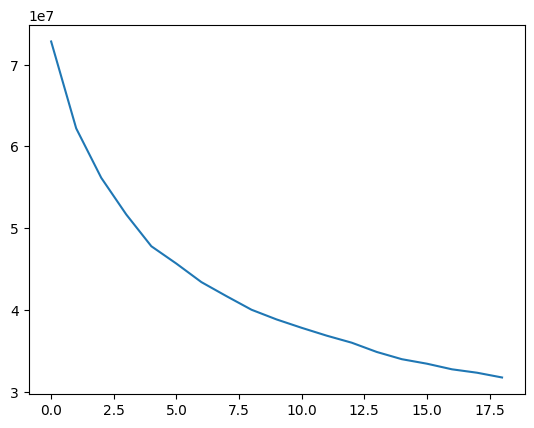

In [65]:
plt.plot(D_list)

21.72

In [5]:
len(kmeans_gpu[1])

NameError: name 'kmeans_gpu' is not defined

In [7]:
km = KMeans(
    n_clusters=12, init='random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
)

In [8]:
y_km = km.fit(hsv)

In [ ]:
distortions = []
for i in range(1,30):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=3000,
        tol=1e-04, random_state=0
    )
    km.fit(hsv)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 30), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 


In [18]:
hue = hsv[:,0]

In [19]:
hue,count  = np.unique(hue,return_counts=True)

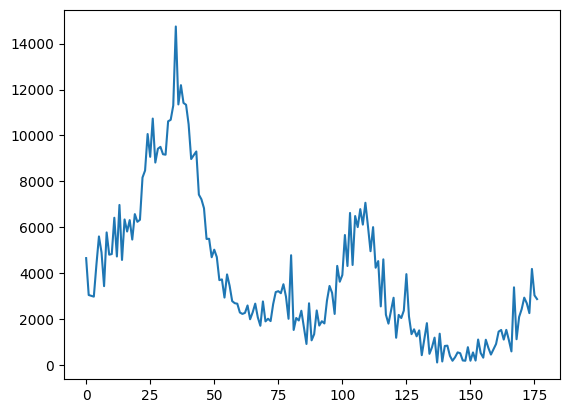

In [21]:
plt.plot(count)